## C-9 Exercise 

### 1. Implementing K-Means Clustering in Python from Scratch
To work with K-Means in Python, we must first import the required libraries and packages. In this case, we will import pandas, numpy, random and matplotlib.pyplot. We also include their respective abbreviations. 

In [19]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

Then, we assign to the data vector the .csv file clustering, which we have previously downloaded. We use the read_csv() function to read it in our Jupyter Notebook. We then use the head() comman to see the first 5 rows of our data and make sure it is the correct dataset. 

In [20]:
data = pd.read_csv('clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y


From our dataset, we will only be working with Loan Amount and Applicant Income variables. We assign this data vector X, as the first line of code indicates. The the following lines show how we plot our scatterplot, using the scatter() function. We specify that that Applicant Income will be plotted in the x-axis and rename it Annual Income, while the Loan Amount will be plotted in the y-axis and rename it Loan Amount (In Thousands). We also specify that the points should be black. 

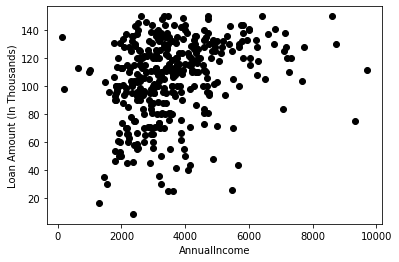

In [21]:
X = data[["LoanAmount","ApplicantIncome"]]
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

The first step, then, is to chose the number of clusters (K). In this case, we have chose K=3. Then we need to randomly select a centroid for each cluster, i.e. the multidimensional average of the cluster or the center of the cluster. The second line of code selects random observations as our centroids, depending on how the data is scattered in the plot. The third line of code plots the same scatterplot as the one before, while the fourth line only plots the 3 centroids we found with the second line and the sample() function; we plot them in red to deifferentiate them from the main plot. 

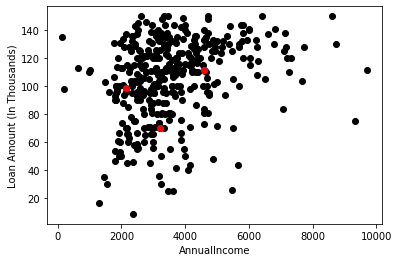

In [4]:
K=3

Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

The following lines of code create a loop. We have initially defined diff as 1. Inside the loop, we are calcualting the difference between the centroids in the previous iteration and the current iteration. For this, we have also randomly assigned all the points to the closest cluster centroids, recomputed the centroids of newly formed clusters and repeated these steps to calcuate the difference until the difference is zero. We use .iterrows() to iterate the dataframe row-wise. We also specify that if the differences remain different from zero, the loop should continue running. The results show the code running until our condition of j==0 has been met. 

In [5]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

/Users/LEBC/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/LEBC/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


436.20732693158055
343.76105398350165
188.75042034296493
212.11585654878053
320.86544014225217
235.63273762230665
248.74878646215663
125.16501318300665
52.84741626127729
98.54724443834282
90.64953219227577
18.274686272279013
9.21023994083339
18.345487493007468
46.27013250786139
0.0


The following plot helps us visualize clusters created through K-Means. First, we define the color of each cluster: blue, green and cyan. The following three lines plot the points and color the points based on the three colors we defined. The fourth line plots the thre three centroids in red and the final line provide labels to the x and y axis. 

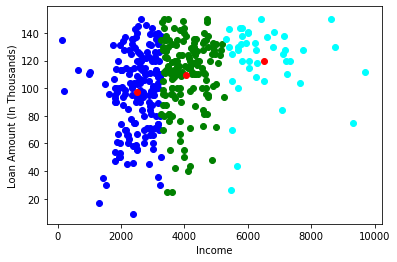

In [6]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

### 2. Implementing K-Means Clustering in Python
For this exercise, we will be segmenting wholesale customers, using the Wholssale customers csv data. First, we need to import the required libraries, which are the same as the ones before, plus the the KMeans library from the sklearn.cluster package. 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

As before, we read our .csv data file using the read_csv() function; we check the first 5 row with head(). We assigned the data to the vector data. 

In [8]:
data=pd.read_csv("Wholesale customers data (1).csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Then, we can get some basic descriptive statistics about the channel, region, freshness, milk, grocery, frozen, detergents_paper and delicatessen (our variables) using the describe() function. We get the count, mean, standard deviation, minimum, first quartile, median, second quartile and the maximum. Clearly the magnitude of channel and region is lower than that of the other variables. 

In [9]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


The next step is to standardize the data because K-Means is a distance-based algorithm, meaning that the difference in magnitude can create a problem. Hence, we need to bring all the variables to the same magnitude. For this, we first import the StandardScaler function from the sklearn.preporcessing package, assign it to the scaler vector, and the use the fit_transform() function to convert the original data into its scaled form. We then show the descriptive statistics of the scaled/standardized data with describe (). 

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


Next, we need to generate a kmeans function, using the respective function of the same name from the package, and fit it on the data. We define the kmeans fucntion with initialization (init function) as k-means++. Then, we fit the k means algorithm on the scaled data with fit(). The results show that we have initialized two clusters; the initialization is not random here. Instead, we have used the k-means++ initialization which generally produces better results. 

In [13]:
kmeans = KMeans(n_clusters=2, init='k-means++')

kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Next, we evaluate how well the formed clusters are, calculating the inertia, i.e. the sum of all points in a cluster, from the centroid of the cluster, of the clusters on the fitted data. We get a value of almost 2600. 

In [14]:
kmeans.inertia_

2599.38555935614

We can then use an elbow curve to determine the optimum number of clusters in Python. We first start by fitting multiple k-means algorithms and storing their values in an empty list. Then, we convert the results into a dataframe and plot them, using the plot() function. 

Text(0, 0.5, 'Inertia')

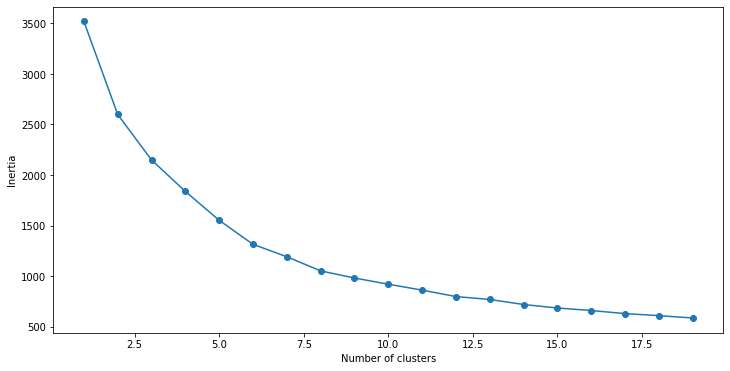

In [15]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

The plot shows that the optimum number of clusters for this data is between 5 to 8. Lets set the number of cluster to 6 and use k-means++ initializaition. We use the KMeans function and specify n_jobs to be -1 and n_clusters to be 6. We the use the predict function on the scaled data. 

In [24]:
# k means using 6 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 6, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

Finally, let’s look at the value count of points in each of the above-formed clusters. So, there are 172 data points belonging to cluster 5 (index 1), then 125 points in cluster 4 (index 3), and so on. This is how we can implement K-Means Clustering in Python.

In [23]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    172
3    125
2     86
5     45
0     11
4      1
Name: cluster, dtype: int64